# Figure 4 - Loss of heterozygosity

In [13]:
# load external dependencies
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import json, matplotlib
s = json.load( open("matplotlibrc.json") )
matplotlib.rcParams.update(s)

import glob, os, re
import numpy as np
import pandas as pd # (*) Pandas for data manipulation

# load internal dependencies
import colors,plot,stats,utils

# absolute file path for data directory
from paths import *

## Data import

Top left panel

In [6]:
# load data
loh_length_df = pd.read_csv(dir_data+'seq/loh-v1.0-data/histogram-data.tsv', sep='\t')    
loh_length_df.head()

,#50kb-bin-center,null,HU,RM
0,25,0.750893,0.732980,0.748970
1,75,0.159386,0.139939,0.152117
2,125,0.052793,0.052950,0.055077
3,175,0.021708,0.033283,0.020607
4,225,0.008484,0.012859,0.010116


Bottom panel

In [7]:
seq_loh_df = pd.read_csv(dir_data+'seq/loh-v1.1-data/WAxNA_F12_1_HU_3.C1-C6.loh.txt', 
                         names=['chr_arabic','start','length','end','C1','C2','C3','C4','C5','C6'],
                         sep='\t')

seq_loh_df = pd.melt(seq_loh_df, 
                     id_vars=['chr_arabic','start','length','end'], 
                     value_vars=['C1','C2','C3','C4','C5','C6'],
                     var_name='isolate', value_name='genotype')

seq_loh_df = utils.chr_to_gw(seq_loh_df)

start = seq_loh_df[['isolate','chr_arabic','chr_roman','start','end','length','pos_start','genotype']]\
.rename(columns={'pos_start':'pos'})
end = seq_loh_df[['isolate','chr_arabic','chr_roman','start','end','length','pos_end','genotype']]\
.rename(columns={'pos_end':'pos'})

seq_loh_df = pd.concat([start, end]).sort_values('pos')

seq_loh_df = seq_loh_df[seq_loh_df.length > 10]

seq_loh_df = pd.pivot_table(seq_loh_df, index=['isolate'], columns=['chr_roman','pos'])['genotype']

seq_loh_df.head()

chr_roman        I                                                        \
pos       2718     65590    66546    69009    69526    190169   191866     
isolate                                                                    
C1               0        0        0        0        0        0        0   
C2               0        0        0        0        0        0        0   
C3               0        0        0        0        0        0        0   
C4               0        0        0        0        0        0        0   
C5               0        0        0        0        0        0        0   

chr_roman                II            ...         XVI                    \
pos       203117   239928   274316     ...    11936626 11944842 11944963   
isolate                                ...                                 
C1               0        0        0   ...           0        0        0   
C2               0        0        0   ...           0        0        0   
C3               0        0        0   ...           0        0        0   
C4               0        0        0   ...           0        0        0   
C5               0        0        0   ...           0        0        0   

chr_roman                                                                 
pos       11964498 11964831 12023996 12024167 12034814 12035158 12048293  
isolate                                                                   
C1               0        0        0        0        0        0        0  
C2               0        0        0        0        0        0        0  
C3               0        0        0        0        0        0        0  
C4               0        0        0        0        0        0        0  
C5               0        0        0        0        0        0        0  

[5 rows x 484 columns]

In [8]:
seq_consensus_df = pd.read_csv(dir_data+'seq/loh-v1.1-data/WAxNA_F12_1_HU_3.C1-C6.consensus.txt', 
                         names=['chr_arabic','start','length','end','genotype'],
                         sep='\t')

seq_consensus_df = utils.chr_to_gw(seq_consensus_df)

start = seq_consensus_df[['chr_arabic','chr_roman','start','end','length','pos_start','genotype']]\
.rename(columns={'pos_start':'pos'})
end = seq_consensus_df[['chr_arabic','chr_roman','start','end','length','pos_end','genotype']]\
.rename(columns={'pos_end':'pos'})

seq_consensus_df = pd.concat([start, end]).sort_values('pos')

seq_consensus_df = pd.pivot_table(seq_consensus_df, columns=['chr_roman','pos'])['genotype']
seq_consensus_df = pd.DataFrame(seq_consensus_df).T

seq_consensus_df.head()

chr_roman        I                                                        \
pos       2718     65590    66546    69009    69112    69289    69526      
0                2        2        1        1        2        2        1   

chr_roman                              ...         XVI                    \
pos       190169   190880   191026     ...    11944963 11964498 11964831   
0                1        0        1   ...           1        1        2   

chr_roman                                                                 
pos       12023996 12024167 12034814 12035158 12048293 12050111 12051171  
0                2        1        1        0        0        1        1  

[1 rows x 728 columns]

Top right panel

In [9]:
# read xlsx file containing the competition assay data
loh_fluctuation_df = pd.ExcelFile(dir_supp+'figures/figureSX_LOH_assay/LOH_assay_raw_data_IVG.xlsx')
# df = df.parse('2 days', keep_default_na=False, na_values='NaN')

loh_fluctuation_df = {sheet: loh_fluctuation_df.parse(sheet, keep_default_na=False, na_values='NaN') 
                      for sheet in loh_fluctuation_df.sheet_names}

loh_fluctuation_df = pd.concat(loh_fluctuation_df)
loh_fluctuation_df = loh_fluctuation_df.reset_index()
loh_fluctuation_df.rename(columns={'level_0':'days'}, inplace=True)

loh_fluctuation_df['LOH rate'] = loh_fluctuation_df['5-FOA+']/loh_fluctuation_df['Total 5-FOA']

loh_fluctuation_df = pd.pivot_table(loh_fluctuation_df[loh_fluctuation_df.genotype==''], 
                                    values='LOH rate', 
                                    index=['founder'], 
                                    columns=['env_test'], aggfunc=[np.mean, lambda x: np.std(x) / x.count() * 1.96])

loh_fluctuation_df = loh_fluctuation_df.reindex(['WA','NA','WAxNA'])

loh_fluctuation_df.head()

mean                      <lambda>                    
env_test       COM        HU        RM       COM        HU        RM
founder                                                             
WA        0.000045  0.002976  0.000123  0.000007  0.000386  0.000011
NA        0.002440  0.003857  0.005187  0.000200  0.000414  0.000535
WAxNA     0.000820  0.003196  0.001869  0.000166  0.000249  0.000267

In [10]:
def heatmap(x, y, z, ax, title, xlabel, ylabel, xticklabels, yticklabels, cmap='RdBu', vmin=0.0, vmax=1.0, show=False):
    '''
    Inspired by:
    - http://stackoverflow.com/a/16124677/395857 
    - http://stackoverflow.com/a/25074150/395857
    '''
    
#     dy = np.arange(len(X)) + 1
#     dx = X.columns.get_level_values('pos').values
#     y, x = np.meshgrid(y, x)
#     z = X.values.T
#     z = z[:-1, :-1]

    # Plot it out
    c = ax.pcolor(x, y, z, linewidths=0, cmap=cmap, vmin=vmin, vmax=vmax)

    # Place the major ticks at the middle of each cell
    ax.set_xticks(np.arange(z.shape[1]) + 0.5, minor=False)
    ax.set_yticks(np.arange(z.shape[0]) + 0.5, minor=False)

    # set tick labels
    ax.set_xticklabels(xticklabels, minor=False, rotation=90)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Remove last blank column
#     ax.set_xlim( (0, z.shape[1]) )
#     ax.set_ylim( (0, z.shape[0]) )
    ax.set_xlim( (min(x), max(x)) )
    ax.set_ylim( (min(y), max(y)) )

    # Turn off all the ticks
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Proper orientation (origin at the top left instead of bottom left)
    ax.invert_yaxis()
    
    return c

def set_custom_labels(index, pos):
    """
    
    """
    start = dict((m[pos], ii) for ii,m in enumerate(index.values))
    end = dict((m[pos], len(index)-ii-1) for ii,m in enumerate(index[::-1].values))
    labels = {key: (start[key] + end.get(key, 0))/2. + 0.5 for key in end.keys()}
    
    return start, end, labels

/Users/ivg/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


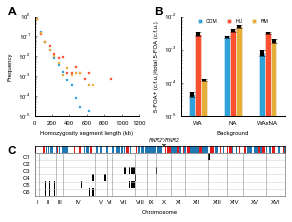

In [11]:
fig = plt.figure(figsize=(4, 3), dpi=300)

import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(2, 2, height_ratios=[2, 1], hspace=0.4, wspace=0.4)

import brewer2mpl
color = brewer2mpl.get_map('Paired', 'qualitative', 12).mpl_colors

# background attributes
color_background = {'WA':color[1], 'NA':color[5], 'WAxNA':'w'}

gs = {}
gs['length'] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=grid[0,0])
gs['fluctuation'] = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=grid[0,1])
gs['loh'] = gridspec.GridSpecFromSubplotSpec(7, 1, subplot_spec=grid[1,:], hspace=0)

### top left panel ###
ax1 = plt.subplot(gs['length'][:])

ax1.plot(loh_length_df['#50kb-bin-center'],
         loh_length_df[['null','HU','RM']],
         ls='', marker='o', ms=2.5, mec='none')

utils.simple_axes(ax1)

ax1.set_yscale('log')
ax1.set_xlim(0,1.2E3)

ax1.set_xlabel('Homozygosity segment length (kb)')
ax1.set_ylabel('Frequency')

ax1.text(-0.175, 1.1, 'A', transform=ax1.transAxes,
         fontsize=12, fontweight='bold', va='top', ha='right')

ax1.legend(bbox_to_anchor=(0.5, 1.), frameon=False,
           loc='upper center', borderaxespad=0., prop={'size':5},
           handlelength=0.75)

### top right panel ###
ax2 = plt.subplot(gs['fluctuation'][:])

loh_fluctuation_df['mean'].plot(ax=ax2, kind='bar', color=colors.fte_colors, yerr = loh_fluctuation_df['<lambda>'])

utils.simple_axes(ax2)

ax2.set_yscale('log')

ax2.set_xlabel('Background')
ax2.set_xticklabels(loh_fluctuation_df.index.get_level_values('founder'), minor=False, rotation=0)
ax2.set_ylabel('5-FOA+ (c.f.u.)/total 5-FOA (c.f.u.)')

ax2.text(-0.175, 1.1, 'B', transform=ax2.transAxes,
         fontsize=12, fontweight='bold', va='top', ha='right')

# ax2.legend(bbox_to_anchor=(1.05, 0.5), frameon=False,
#            loc='center left', borderaxespad=0.,
#            handlelength=0.75, title='Environment')

ax2.legend(bbox_to_anchor=(0.5, 1.), frameon=False,
           loc='upper center', borderaxespad=0., prop={'size':5},
           handlelength=0.75, ncol=3)

### bottom panel ###
ax3 = plt.subplot(gs['loh'][:1])

ax3.text(-0.075, 1.1, 'C', transform=ax3.transAxes,
         fontsize=12, fontweight='bold', va='top', ha='right')

# make a color map of fixed colors
cmap = mpl.colors.ListedColormap([color_background['WA'], color_background['WAxNA'], color_background['NA']])
bounds=[0,1,2]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# # tell imshow about color map so that only set colors are used
# img = plt.imshow(zvals, interpolation='nearest', origin='lower',
#                     cmap=cmap, norm=norm)

# heatmap(seq_consensus_df, ax3, '', '', '', [], [], 
#         cmap=cmap, vmin=0.0, vmax=seq_consensus_df.max()[0])

x = seq_consensus_df.columns.get_level_values('pos').values
y = np.arange(len(seq_consensus_df.index))
data = seq_consensus_df.values

ax3.set_title('WAxNA F12 1 HU 3', fontsize=6)

heatmap(np.r_[x, x.max()+1], np.r_[y, y.max()+1], data, 
        ax3, '', '', '', [], [], cmap=cmap, vmin=0, vmax=2)


# show de novo mutation in RNR2 at chr X 392908
loc = (sgd_length[sgd_length.chr_arabic==10].chr_start.squeeze() + 392908)

trans = ax3.get_xaxis_transform() # x in data units, y in axes fraction

ann = ax3.annotate('RNR2*/RNR2', xy=(loc, 1.05),
                   xytext=(0, 3), textcoords='offset points',
                   arrowprops=dict(arrowstyle='wedge,tail_width=0.7', color='black'),
                   xycoords=trans, fontsize=5, style='italic', va='bottom', ha='center')

ax4 = plt.subplot(gs['loh'][1:])

x = seq_loh_df.columns.get_level_values('pos').values
y = np.arange(len(seq_loh_df.index.get_level_values('isolate')))
data = seq_loh_df.values

# make a color map of fixed colors
cmap = mpl.colors.ListedColormap(['w', 'k'])
bounds=[0,1]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

heatmap(np.r_[x, x.max()+1], np.r_[y, y.max()+1], data, ax4, '', '', '', [], [], cmap=cmap)

ylabels = seq_loh_df.index
ax4.set_yticks(np.arange(len(ylabels)) + 0.5, minor=False)
ax4.set_yticklabels(ylabels, minor=False)
[ax4.axhline(g, lw=0.5, ls="-", color="lightgray") for g in np.arange(len(ylabels))]

xlabels = sgd_length.chr_start + (sgd_length.chr_end - sgd_length.chr_start)/2.
xstart = sgd_length.chr_start
ax4.set_xticks(xlabels, minor=False)
ax4.set_xticklabels(sgd_length.chr_arabic.apply(utils.int2roman), minor=False)
xgrid=[xst+1. for xst in list(set(xstart))]
[ax4.axvline(g, lw=0.5, ls="-", color="gray") for g in xgrid]

ax4.set_xlabel('Chromosome')

trans = ax4.get_xaxis_transform() # x in data units, y in axes fraction

ax4.legend(bbox_to_anchor=(1.05, 0.5), frameon=False,
           loc='center left', borderaxespad=0.,
           handlelength=0.75, title='Genotype')

for sp in ax3.spines.values():
    sp.set(color='k', linewidth=0.75, linestyle='-')
for sp in ax4.spines.values():
    sp.set(color='gray', linewidth=0.75, linestyle='-')

# axes limits
for ax in fig.get_axes():
    ax.xaxis.label.set_size(6)
    ax.yaxis.label.set_size(6)
    ax.tick_params(axis='both', which='major', size=2, labelsize=6)
    ax.tick_params(axis='both', which='minor', size=1, labelsize=4)

fig.savefig(dir_paper+'figures/figure4/figure4.png', dpi=300, bbox_inches='tight')
fig.savefig(dir_paper+'figures/figure4/figure4.svg', dpi=300, bbox_inches='tight')
plt.show()